In [2]:
file_prefix <- "ch08.1"
source("preset.R")

# data

In [6]:
data <- read_csv("data/z6N8z2N7.csv") %>% 
    mutate(s = factor(s))
stan_data <- list(
  N_total = nrow(data), 
  N_subj = n_distinct(data$s), 
  y = data$y, 
  s = as.numeric(data$s)
)

Parsed with column specification:
cols(
  y = col_double(),
  s = col_character()
)



In [7]:
fit <- stan(file = "model/ch08.1.stan", data = stan_data, seed = 1234, 
            chains = 3, iter = 5000, warmup = 300, thin = 1)

In [8]:
save(fit, file = save_file_name("fit"))
load(file = save_file_name("fit"))

In [ ]:
# diagnosis
#ggmcmc(ggs(fit, inc_warmup = T), file = "plot/ch08.1.traceplot.pdf", plot = "traceplot")
#ggmcmc(ggs(fit), file = "plot/ch08.1.pdf")

In [9]:
fit

Inference for Stan model: ch08.
3 chains, each with iter=5000; warmup=300; thin=1; 
post-warmup draws per chain=4700, total post-warmup draws=14100.

           mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
theta[1]   0.67    0.00 0.13   0.39   0.58   0.68   0.76   0.89 11189    1
theta[2]   0.36    0.00 0.14   0.12   0.26   0.35   0.46   0.65 11689    1
lp__     -15.89    0.01 1.05 -18.75 -16.29 -15.57 -15.16 -14.88  6400    1

Samples were drawn using NUTS(diag_e) at Wed Jan 15 23:45:29 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [13]:
res <- fit_to_tibble(fit)

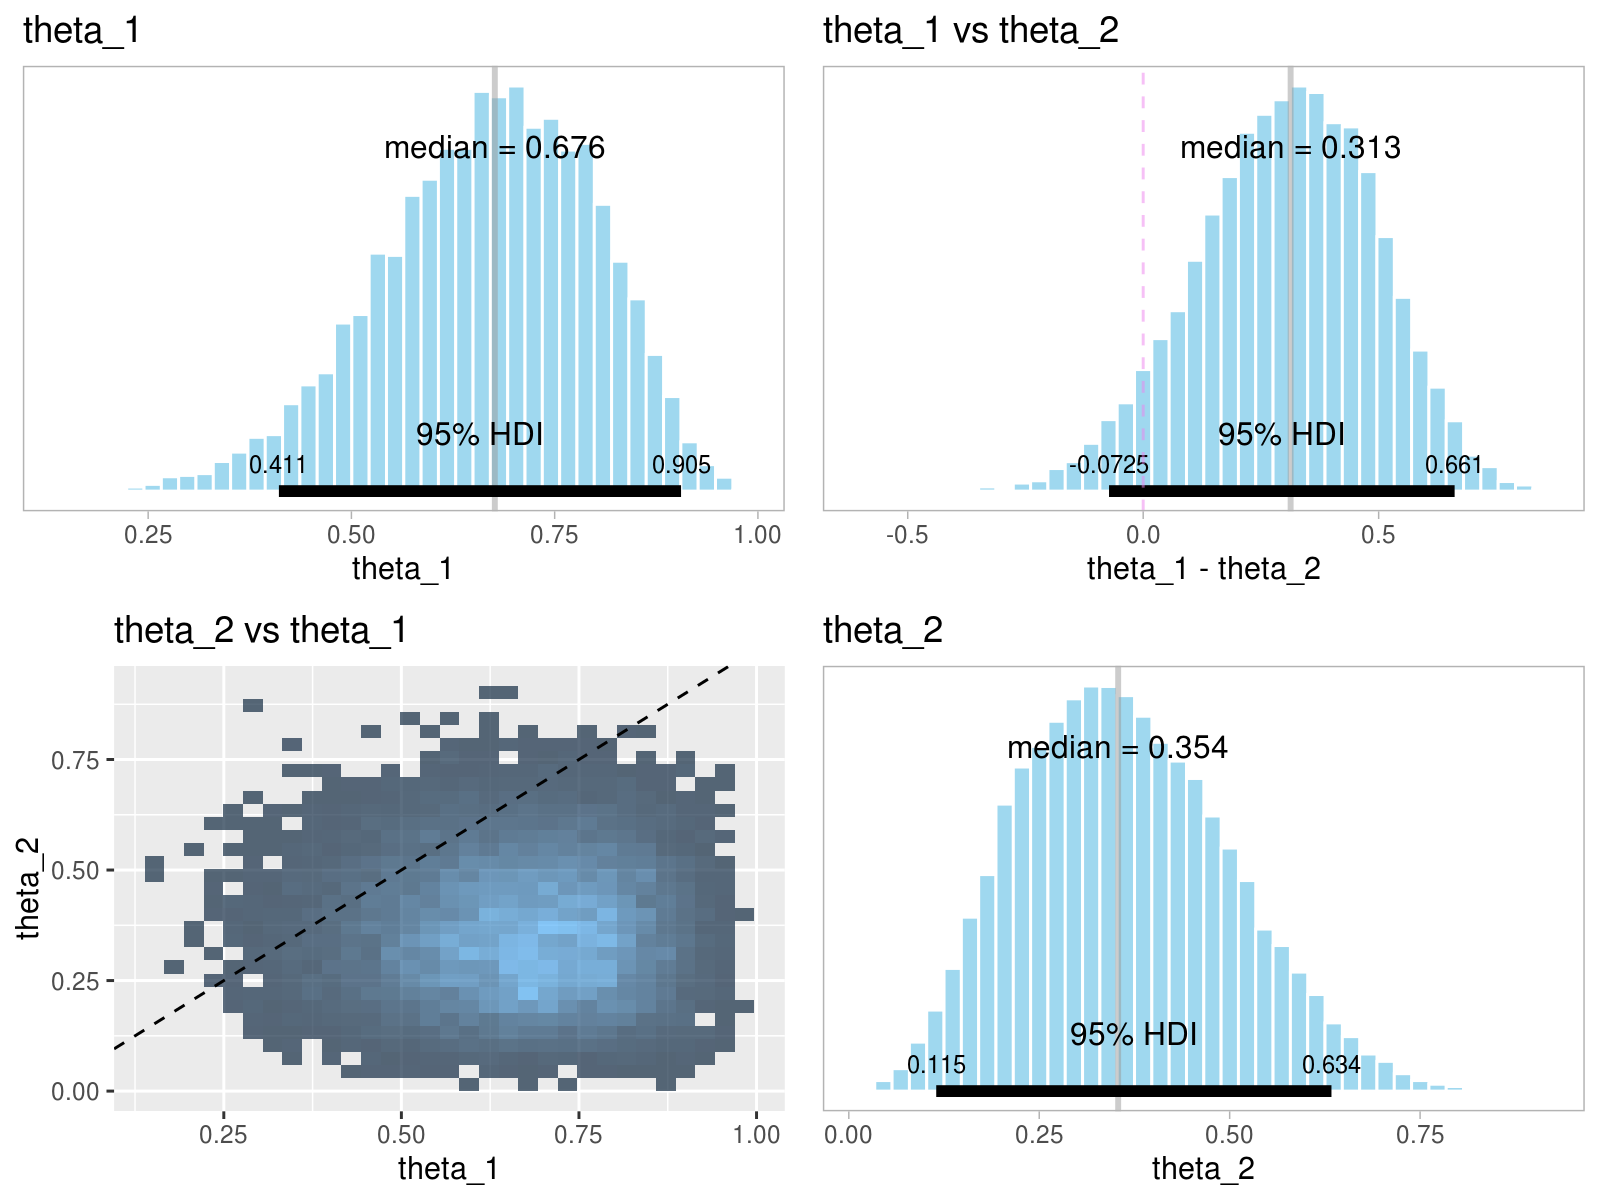

In [15]:
# check posteria
set_plot_size(8, 6)
plot_post_pair_diff(res, comp_idxs = c(1, 2), par_prefix = "theta")